In [ ]:
## Import Required libraries for advanced Regression

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [7]:
## Ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [8]:
## Set the display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [9]:
## Load the csv file
data = pd.read_csv('train.csv')

## Display first 5 rows 
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
## Check the dimensions
print("Number of Rows = ", data.shape[0])
print("Number of Columns = ", data.shape[1])

Number of Rows =  1460
Number of Columns =  81


# Data Description

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
#### From the above output we can understand the column details and the type of the data or the features available for the advanced regression.


In [12]:
# To get the description of the train dataset
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [13]:
#checking duplicates in the data set 
sum(data.duplicated(subset = 'Id')) == 0

True

In [14]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [15]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

Method to remove outliers

In [16]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [17]:
#Checking the shape of the dataframe before removing outliers
data.shape

(1460, 81)

In [18]:
# As it is observed that there are multiple columns with high nulls, lets group them together
data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the priceHence, we will first impute the categorical variables with 'None'

In [19]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

In [20]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [21]:
# We can analyse these columns one by one
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [23]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [25]:
# It can be seen from data dictionary that "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [26]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [28]:
data['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [30]:
# Check the no. of rows retained
len(data.index)
len(data.index)/1460

1.0

# Some EDA on the filtered data
All numeric (float and int) variables in the dataset

In [31]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [32]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [33]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

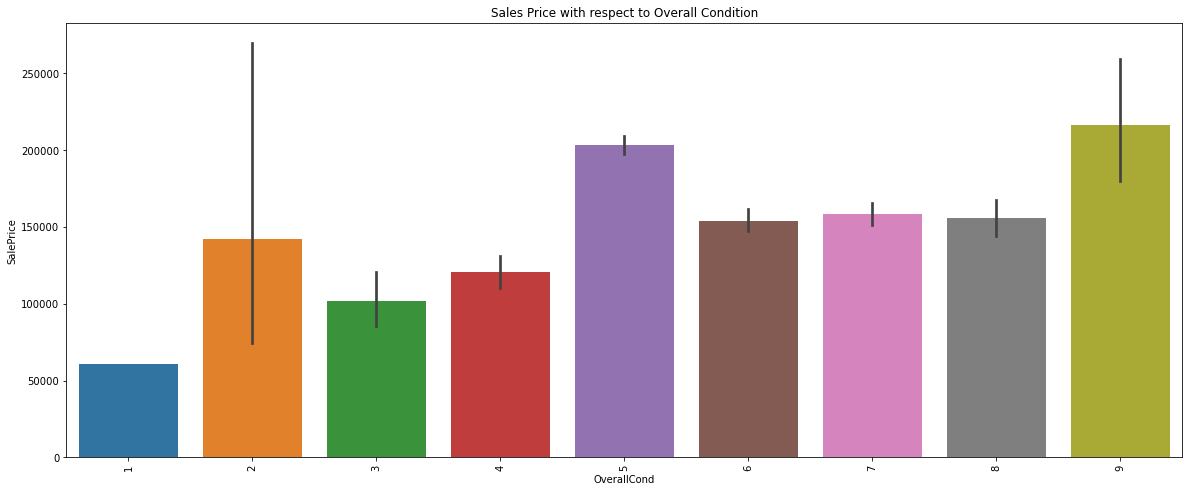

In [34]:
# plot 'overall condition' with respect to 'Saleprice' to analyse further

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

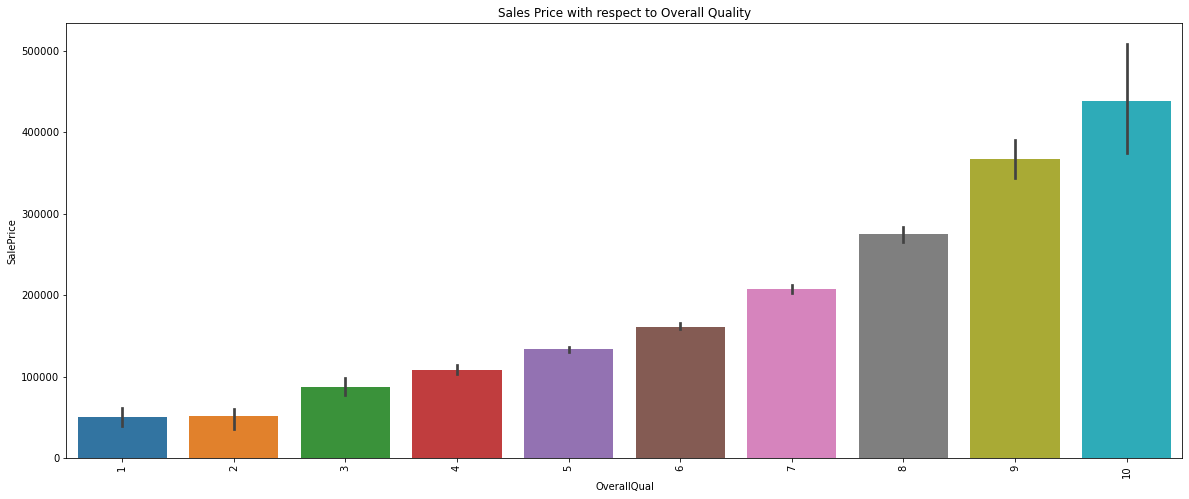

In [36]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

Increase in the overall quality has a direct positive effect on the sale price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

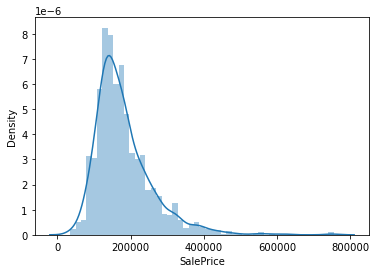

In [37]:
sns.distplot(data['SalePrice'])

In [38]:
# correlation matrix for numeric variables
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [39]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

We can see that some of the variables are correlated
Before dropping these columns, we will first check their predictive power

In [40]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

So we can Drop columns that are correlated and not contributing to 'SalePrice'

In [41]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()
# View the dataset after dropping irrelavant columns

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [42]:
#Numeric columns
data.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         80.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         71.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         73.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         73.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         71.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         71.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         66.5     9180            5            7   
43      44          20         70.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         65.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

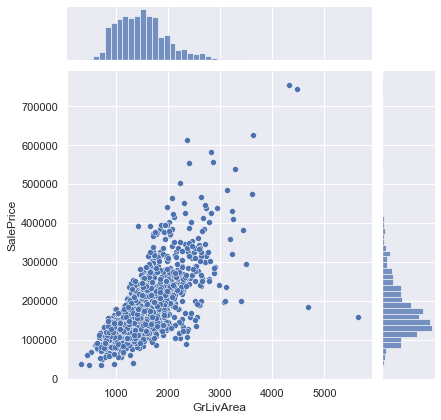

In [43]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [44]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')


In [45]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

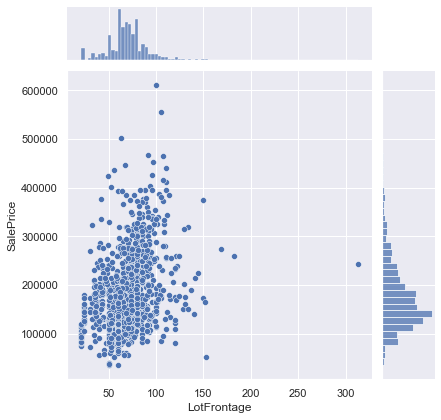

In [46]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

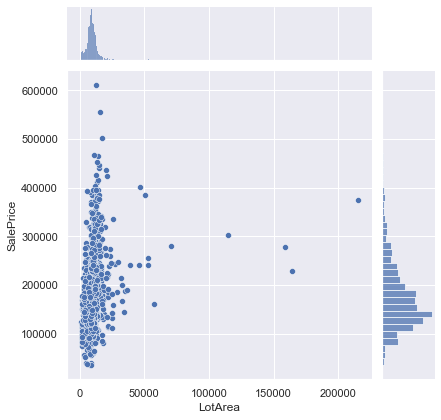

In [47]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

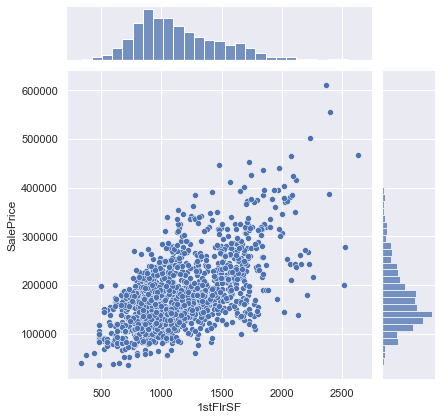

In [48]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

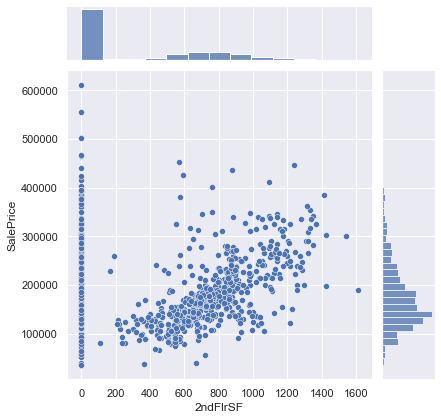

In [49]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

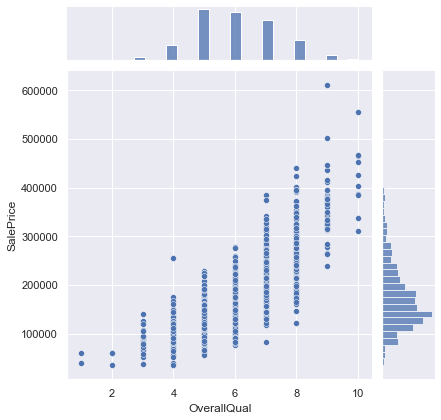

In [50]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

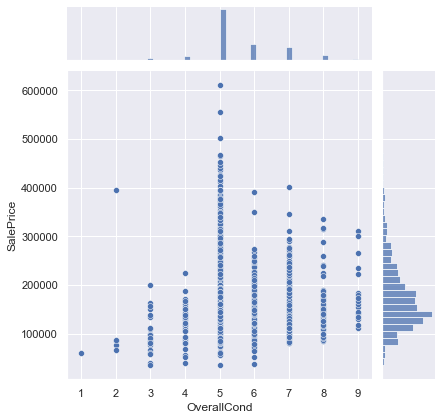

In [51]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

# We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [52]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

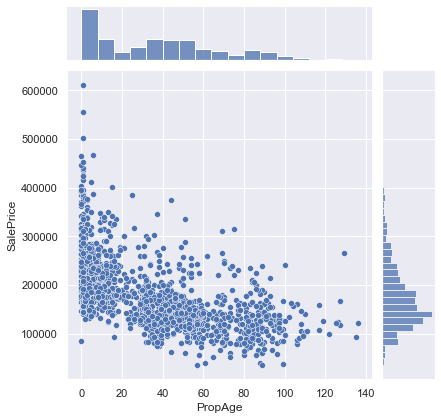

In [53]:
# plot PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value
Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [54]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [55]:
data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [56]:
data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [57]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [58]:
# we can check variance of the colmuns
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         80.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         71.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         73.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         73.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         71.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         71.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         66.5     9180            5            7   
43      44          20         70.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         65.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [59]:
for i in l2:
    print(data[i].value_counts())

1       1
956     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
961     1
960     1
959     1
958     1
978     1
979     1
980     1
991     1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
990     1
981     1
989     1
988     1
987     1
986     1
985     1
984     1
983     1
982     1
957     1
955     1
911     1
954     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
915     1
914     1
913     1
932     1
933     1
934     1
945     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
944     1
935     1
943     1
942     1
941     1
940     1
939     1
938     1
937     1
936     1
1000    1
1001    1
1002    1
1003    1
1069    1
1068    1
1067    1
1066    1
1065    1
1064    1
1063    1
1062    1


In [60]:
data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

# 3. Data Preparation

In [62]:
# Drop 'Id' from Dataframe

data = data.drop(['Id'], axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        none     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          RFn         608         TA   
3           1          Gd     Detchd          Unf         642         TA   
4           1          TA     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3  

In [63]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [64]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      27
float64     2
Name: 0, dtype: int64

In [65]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [66]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Creating Dummy columns to convert categorical into numerical

In [67]:
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0     208500        5   
1              0          0            0         0     181500       31   
2              0          0            0         0     223500        7   
3            272          0            0         0     140000       91   
4              0          0            0         0     250000        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

In [68]:
X = data.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  MSZoning_FV  \
0              0          0            0         0        5            0   
1              0          0            0         0       31            0   
2              0          0            0         0        7            0   
3            272          0            0         0       91            0   
4              0          0            0         0        8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

In [70]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [76]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])


In [79]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
11        -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   
1070      -0.378185  -0.115383     3.351363 -0.054574  0.445587            0   
513        2.265177  -0.115383    -0.268919 -0.054574 -0.447904            0   
467       -0.378185  -0.115383    -0.268919 -0.054574  0.908879            0   
993       -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
11              0            1            0             0             0   
1070            0            1            0             0             0   
513             0            1            0             0             0   
467             0            1            0             0             0   
993             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
11               0                0                0                1   
1070             1                0                0                1   
513              1                0                0                0   
467              1                0                0                1   
993              1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
11                    0              0              0                 1   
1070                  0              0              0                 1   
513                   0              0              0                 0   
467                   0              0              0                 1   
993                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
11                0              0                     0                    0   
1070              0              0                     0                    0   
513               0              0                     0         

In [80]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0  1.326790   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0  0.303675   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0 -0.924063   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0 -0.037363   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0 -0.105571   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
461             0            0            1            0             0   
335             0            0            1            0             0   
200             0            0            0            1             0   
214             0            0            1            0             0   
1003            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
461              0             1                0                0   
335              0             0                1                0   
200              0             1                0                0   
214              0             0                0                0   
1003             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
461                 1                  0              0              0   
335                 0                  0              0              0   
200                 1                  0              0              0   
214                 1                  0              1              0   
1003                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
461                  1              0              0                     0   
335                  0              0              1                     0   
200                  0              0              0                     0   
214                  0              0              0                     0   
1003                

# 3. Model Building and Evaluation

In [90]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [97]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm,n_features_to_select=100)
rfe = rfe.fit(X_train,y_train) 

In [98]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 48),
 ('LotFrontage', False, 108),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 89),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 75),
 ('BsmtHalfBath', False, 100),
 ('FullBath', False, 110),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 58),
 ('KitchenAbvGr', False, 82),
 ('Fireplaces', False, 78),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 91),
 ('EnclosedPorch', False, 92),
 ('3SsnPorch', False, 77),
 ('ScreenPorch', False, 74),
 ('PoolArea', False, 70),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 111),
 ('LotShape_IR3', False, 32),
 ('LotShape_Reg', False, 90),
 ('LandContour_HLS', False, 12),


In [99]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exterior1st

In [100]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageQual_TA', 'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=110)

In [101]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [102]:
X_train_rfe = pd.DataFrame(X_train[col])

In [103]:
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
11    0.154684     2.241710    -0.513939    1.323938     0.345478  0.113320   
1070 -0.020017    -0.764271    -0.513939    0.360916     0.030191 -0.267693   
513  -0.115156    -0.012775    -0.513939   -0.223442     0.119563 -0.176705   
467  -0.086269    -0.764271     1.258264   -0.106571    -0.764234 -0.722635   
993  -0.148775    -0.012775    -0.513939   -1.008820    -0.709617 -1.115022   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
11    1.995226     -0.111211   1.923409 -1.209026            0            0   
1070 -0.769750     -0.111211  -0.932170  0.445587            0            0   
513  -0.769750     -0.111211  -0.860557 -0.447904            0            0   
467   1.060654     -0.111211   0.401627  0.908879            0            0   
993   1.046127     -0.111211   0.079368 -1.209026            0            0   

      MSZoning_RL  MSZoning_RM  LotConfig_FR2  LotConfig_FR3  LandSlope_Sev  \
11              1            0              0              0              0   
1070            1            0              0              0              0   
513             1            0              0              0              0   
467             1            0              0              0              0   
993             1            0              0              0              0   

      Neighborhood_BrDale  Neighborhood_Crawfor  Neighborhood_NPkVill  \
11                      0                     0                     0   
1070                    0                     0                     0   
513                     0                     0                     0   
467                     0                     0                     0   
993                     0                     0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_SWISU  \
11                       0                     1                   0   
1070                     0                     0                   0   
513                      0                     0                   0   
467                      0                     0                   0   
993                      0                     0                   0   

      Neighborhood_StoneBr  Neighborhood_Veenker  Condition1_Feedr  \
11                       0                     0                 0   
1070                     0                     0                 0   
513                      0                     0                 0   
467                      0                     0                 0   
993                      0                     0                 0   

      Condition1_Norm  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  \
11                  1                0                0                0   
1070                1                0                0                0   
513                 1                0                0                0   
467                 0                0                0                0   
993                 1                0                0                0   

      Condition1_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
11                  0                0                0               0   
1070                0                0                0               0   
513                 0                0                0               0   
467                 0                0                0               0   
993                 0                0                0               0   

      BldgType_TwnhsE  HouseStyle_2.5Fin  HouseStyle_2.5Unf  RoofStyle_Gable  \
11                  0                  0                  0                0   
1070                0                  0                  0                0   
513                 0                  0                  0                1   
467                 0                  0                  0  

In [104]:
X_train_rfe.shape

(1000, 100)

In [106]:
# predict
from sklearn import metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.943068317886723

In [107]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-9.362761048124758e+19

As Test R2 is too low, we will check for some alternate methods of Regression

In [108]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 48),
 ('LotFrontage', False, 108),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 89),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 75),
 ('BsmtHalfBath', False, 100),
 ('FullBath', False, 110),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 58),
 ('KitchenAbvGr', False, 82),
 ('Fireplaces', False, 78),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 91),
 ('EnclosedPorch', False, 92),
 ('3SsnPorch', False, 77),
 ('ScreenPorch', False, 74),
 ('PoolArea', False, 70),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 111),
 ('LotShape_IR3', False, 32),
 ('LotShape_Reg', False, 90),
 ('LandContour_HLS', False, 12),


In [109]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exterior1st

In [110]:
X_test_rfe = X_test[col1]

In [111]:
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
461   -0.339155     0.620334     3.325664   -0.211663    -1.205047 -1.556925   
335   17.009026    -0.825989     0.435637    1.881258     1.075768  1.258064   
200   -0.190859    -1.549150    -0.527705   -1.026482     0.157612 -0.084718   
214    0.068493    -0.102827     1.398980   -0.146477    -0.891708 -1.249541   
1003   0.134598    -0.825989     0.435637   -1.026482     1.515413  1.422541   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
461   0.506037      -0.09698  -0.813247  1.326790            0            0   
335  -0.435654      -0.09698   0.616745  0.303675            0            0   
200  -0.835813      -0.09698  -0.843999 -0.924063            0            0   
214   0.848688      -0.09698  -0.248718 -0.037363            0            0   
1003 -0.835813      -0.09698   0.383905 -0.105571            0            0   

      MSZoning_RL  MSZoning_RM  LotConfig_FR2  LotConfig_FR3  LandSlope_Sev  \
461             1            0              0              0              0   
335             1            0              0              0              1   
200             0            1              0              0              0   
214             1            0              1              0              0   
1003            1            0              0              0              0   

      Neighborhood_BrDale  Neighborhood_Crawfor  Neighborhood_NPkVill  \
461                     0                     0                     0   
335                     0                     0                     0   
200                     0                     0                     0   
214                     0                     0                     0   
1003                    0                     0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_SWISU  \
461                      0                     0                   1   
335                      0                     0                   0   
200                      0                     0                   0   
214                      0                     0                   0   
1003                     0                     0                   0   

      Neighborhood_StoneBr  Neighborhood_Veenker  Condition1_Feedr  \
461                      0                     0                 1   
335                      0                     0                 0   
200                      0                     0                 0   
214                      0                     0                 0   
1003                     0                     0                 1   

      Condition1_Norm  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  \
461                 0                0                0                0   
335                 1                0                0                0   
200                 1                0                0                0   
214                 1                0                0                0   
1003                0                0                0                0   

      Condition1_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
461                 0                0                0               0   
335                 0                1                0               0   
200                 0                0                0               0   
214                 0                0                0               0   
1003                0                0                1               0   

      BldgType_TwnhsE  HouseStyle_2.5Fin  HouseStyle_2.5Unf  RoofStyle_Gable  \
461                 0                  0                  0                1   
335                 0                  0                  0                1   
200                 0                  0                  0                1   
214                 0                  0                

# Lasso and Ridge Regression


Let's now try predicting house prices and perform lasso and ridge regression.

In [112]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [113]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.422208      0.395160         0.008457        0.009124      0.0001   
1       0.237114      0.033456         0.007050        0.007154       0.001   
2       0.243021      0.017554         0.004197        0.002560        0.01   
3       0.294670      0.075422         0.005795        0.001936        0.05   
4       0.256061      0.021565         0.004797        0.001600         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17550.807853      -15019.772072      -15571.617357   
1   {'alpha': 0.001}      -17550.243288      -15019.607937      -15560.814581   
2    {'alpha': 0.01}      -17546.629740      -15017.905188      -15502.934832   
3    {'alpha': 0.05}      -17534.511368      -15010.173268      -15340.022281   
4     {'alpha': 0.1}      -17534.793968      -14999.847732      -15261.176289   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -16957.651498      -15324.977514    -16084.965259      988.536266   
1      -16957.881377      -15317.826312    -16081.274699      990.674161   
2      -16960.107363      -15314.495195    -16068.414464      997.192845   
3      -16961.541818      -15312.109773    -16031.671702     1016.148890   
4      -16953.129304      -15301.785404    -16010.146539     1029.291202   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -11442.134360       -11840.504683   
1               25       -11442.137293       -11840.505830   
2               24       -11442.242615       -11840.605859   
3               23       -11442.945192       -11841.110854   
4               22       -11443.824013       -11841.736930   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11706.895610       -11380.011347       -11582.587077   
1       -11706.913255       -11380.016743       -11582.588316   
2       -11707.157011       -11380.168970       -11582.634178   
3       -11708.476034       -11381.037417       -11582.844278   
4       -11710.272180       -11382.330471       -11583.108439   

   mean_train_score  std_train_score  
0     -11590.426616       168.778377  
1     -11590.432287       168.779280  
2     -11590.561726       168.785690  
3     -11591.282755       168.775997  
4     -11592.254407       168.732340

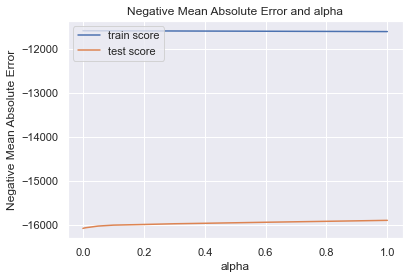

In [115]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [117]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ -1735.56369527,    230.85337704,   8054.98304634,   9842.10374849,
         6774.80710913,   2106.67308139,   8763.87387654,   1345.18778526,
         7011.32510824,  12475.75963246,  20685.63533192,   2032.41004568,
         5401.6957976 ,    981.40687952,   -648.61942374,    300.62202819,
          343.66266396,  -1914.3303424 ,  -1538.07464049,   1348.60645137,
         4453.51607536,   2347.00261863,   1022.18781173,    985.13650301,
         1455.79495223,   1784.03160979,   1686.0245005 , -11152.63520902,
        39496.67211524,  30683.6640584 ,  25651.61052822,  22313.10170256,
           86.74133584,  -9451.37809488,   1254.16152275,   5523.89567661,
        -6522.75584571,    562.16604691,   4058.64987479,  -6578.44320121,
       -20334.36182801,  -4354.3367485 ,   5407.31512237, -27723.98186518,
         1918.98871736,   3128.15950753,  -4161.0571651 ,  -6192.57468106,
       -10754.50020165,  13475.03246111, -18061.83072039, -12198.70259639,
       -11099.23964587, -

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [118]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 155751.564),
 ('MSSubClass', -1735.564),
 ('LotFrontage', 230.853),
 ('LotArea', 8054.983),
 ('OverallQual', 9842.104),
 ('OverallCond', 6774.807),
 ('MasVnrArea', 2106.673),
 ('BsmtFinSF1', 8763.874),
 ('BsmtFinSF2', 1345.188),
 ('TotalBsmtSF', 7011.325),
 ('1stFlrSF', 12475.76),
 ('2ndFlrSF', 20685.635),
 ('LowQualFinSF', 2032.41),
 ('GrLivArea', 5401.696),
 ('BsmtFullBath', 981.407),
 ('BsmtHalfBath', -648.619),
 ('FullBath', 300.622),
 ('HalfBath', 343.663),
 ('BedroomAbvGr', -1914.33),
 ('KitchenAbvGr', -1538.075),
 ('Fireplaces', 1348.606),
 ('GarageArea', 4453.516),
 ('WoodDeckSF', 2347.003),
 ('OpenPorchSF', 1022.188),
 ('EnclosedPorch', 985.137),
 ('3SsnPorch', 1455.795),
 ('ScreenPorch', 1784.032),
 ('PoolArea', 1686.025),
 ('PropAge', -11152.635),
 ('MSZoning_FV', 39496.672),
 ('MSZoning_RH', 30683.664),
 ('MSZoning_RL', 25651.611),
 ('MSZoning_RM', 22313.102),
 ('LotShape_IR2', 86.741),
 ('LotShape_IR3', -9451.378),
 ('LotShape_Reg', 1254.162),
 ('LandContour_

In [119]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9430684692369933
0.8910688883612241


In [120]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 24086.54611165631


In [121]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [122]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [123]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable       Coeff
0     constant  155751.564
1   MSSubClass   -1735.564
2  LotFrontage     230.853
3      LotArea    8054.983
4  OverallQual    9842.104

In [124]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable       Coeff
0                 constant  155751.564
111    Exterior2nd_CmentBd   65258.849
143            BsmtCond_Po   45672.045
29             MSZoning_FV   39496.672
210  SaleCondition_Partial   33220.167
30             MSZoning_RH   30683.664
66    Neighborhood_StoneBr   30112.602
184        GarageType_none   29624.850
182     GarageType_CarPort   29585.236
198           SaleType_CWD   28917.017
183      GarageType_Detchd   28352.007
181     GarageType_BuiltIn   27210.130
179      GarageType_Attchd   26887.951
31             MSZoning_RL   25651.611
199           SaleType_Con   23371.842
195       MiscFeature_Othr   22418.794
32             MSZoning_RM   22313.102
180     GarageType_Basment   21979.584
11                2ndFlrSF   20685.635
197       MiscFeature_none   20087.913
59    Neighborhood_NoRidge   19142.831
141          BsmtQual_none   18575.123
124       MasVnrType_Stone   17878.840
57    Neighborhood_NPkVill   17527.818
196       MiscFeature_Shed   17491.253
120    Exterior2nd_Wd Sdng   17024.702
119    Exterior2nd_VinylSd   16977.970
60    Neighborhood_NridgHt   15045.078
168       Electrical_FuseP   14147.447
50    Neighborhood_Crawfor   13475.032
70         Condition1_Norm   12578.756
155      BsmtFinType1_none   12505.971
10                1stFlrSF   12475.760
74         Condition1_RRAn   12475.507
122     MasVnrType_BrkFace   12187.432
123        MasVnrType_None   11857.268
167       Electrical_FuseF   11740.960
146        BsmtExposure_Gd   11368.776
4              OverallQual    9842.104
201         SaleType_ConLI    9190.748
7               BsmtFinSF1    8763.874
109    Exterior2nd_BrkFace    8132.548
3                  LotArea    8054.983
72         Condition1_PosN    7786.640
92          RoofStyle_Shed    7298.260
75         Condition1_RRNe    7128.675
209   SaleCondition_Normal    7077.557
136       Foundation_Stone    7017.448
9              TotalBsmtSF    7011.325
5              OverallCond    6774.807
151       BsmtFinType1_GLQ    6575.991
114    Exterior2nd_MetalSd    6340.920
82       HouseStyle_1Story    6297.195
68    Neighborhood_Veenker    6065.815
36         LandContour_HLS    5523.896
43           LandSlope_Mod    5407.315
13               GrLivArea    5401.696
107    Exterior2nd_AsphShn    5273.359
134       Foundation_PConc    5211.112
81       HouseStyle_1.5Unf    4921.776
87         HouseStyle_SLvl    4755.029
21              GarageArea    4453.516
154       BsmtFinType1_Unf    4417.775
39       LotConfig_CulDSac    4058.650
189          GarageQual_Gd    3997.101
200         SaleType_ConLD    3894.289
69        Condition1_Feedr    3621.313
112    Exterior2nd_HdBoard    3568.842
176         FireplaceQu_Po    3548.796
133      Foundation_CBlock    3448.485
208   SaleCondition_Family    3413.221
76         Condition1_RRNn    3383.265
46     Neighborhood_BrDale    3128.160
162           HeatingQC_Fa    3034.115
150       BsmtFinType1_BLQ    3025.139
95     Exterior1st_BrkFace    2842.117
86       HouseStyle_SFoyer    2762.313
121    Exterior2nd_Wd Shng    2445.678
170       Electrical_SBrkr    2434.525
22              WoodDeckSF    2347.003
116    Exterior2nd_Plywood    2282.861
6               MasVnrArea    2106.673
12            LowQualFinSF    2032.410
45    Neighborhood_Blueste    1918.989
26             ScreenPorch    1784.032
118     Exterior2nd_Stucco    1767.353
202         SaleType_ConLw    1758.127
27                PoolArea    1686.025
164           HeatingQC_Po    1539.184
157       BsmtFinType2_GLQ    1493.992
25               3SsnPorch    1455.795
20              Fireplaces    1348.606
8               BsmtFinSF2    1345.188
35            LotShape_Reg    1254.162
23             OpenPorchSF    1022.188
24           EnclosedPorch     985.137
14            BsmtFullBath     981.407
38         LandContour_Lvl     562.166
17                HalfBath     343.663
16                FullBath     300.622
2              LotFrontage     230.853
33            LotShape_IR2      86.741
1

In [133]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable       Coeff
0                 constant  155751.564
111    Exterior2nd_CmentBd   65258.849
143            BsmtCond_Po   45672.045
29             MSZoning_FV   39496.672
210  SaleCondition_Partial   33220.167
30             MSZoning_RH   30683.664
66    Neighborhood_StoneBr   30112.602
184        GarageType_none   29624.850
182     GarageType_CarPort   29585.236
198           SaleType_CWD   28917.017
183      GarageType_Detchd   28352.007
181     GarageType_BuiltIn   27210.130
179      GarageType_Attchd   26887.951
31             MSZoning_RL   25651.611
199           SaleType_Con   23371.842
195       MiscFeature_Othr   22418.794
32             MSZoning_RM   22313.102
180     GarageType_Basment   21979.584
11                2ndFlrSF   20685.635
197       MiscFeature_none   20087.913
59    Neighborhood_NoRidge   19142.831
141          BsmtQual_none   18575.123
124       MasVnrType_Stone   17878.840
57    Neighborhood_NPkVill   17527.818
196       MiscFeature_Shed   17491.253
120    Exterior2nd_Wd Sdng   17024.702
119    Exterior2nd_VinylSd   16977.970
60    Neighborhood_NridgHt   15045.078
168       Electrical_FuseP   14147.447
50    Neighborhood_Crawfor   13475.032
70         Condition1_Norm   12578.756
155      BsmtFinType1_none   12505.971
10                1stFlrSF   12475.760
74         Condition1_RRAn   12475.507
122     MasVnrType_BrkFace   12187.432
123        MasVnrType_None   11857.268
167       Electrical_FuseF   11740.960
146        BsmtExposure_Gd   11368.776
4              OverallQual    9842.104
201         SaleType_ConLI    9190.748
7               BsmtFinSF1    8763.874
109    Exterior2nd_BrkFace    8132.548
3                  LotArea    8054.983
72         Condition1_PosN    7786.640
92          RoofStyle_Shed    7298.260
75         Condition1_RRNe    7128.675
209   SaleCondition_Normal    7077.557
136       Foundation_Stone    7017.448
9              TotalBsmtSF    7011.325
5              OverallCond    6774.807
151       BsmtFinType1_GLQ    6575.991
114    Exterior2nd_MetalSd    6340.920
82       HouseStyle_1Story    6297.195
68    Neighborhood_Veenker    6065.815
36         LandContour_HLS    5523.896
43           LandSlope_Mod    5407.315
13               GrLivArea    5401.696
107    Exterior2nd_AsphShn    5273.359
134       Foundation_PConc    5211.112
81       HouseStyle_1.5Unf    4921.776
87         HouseStyle_SLvl    4755.029
21              GarageArea    4453.516
154       BsmtFinType1_Unf    4417.775
39       LotConfig_CulDSac    4058.650
189          GarageQual_Gd    3997.101
200         SaleType_ConLD    3894.289
69        Condition1_Feedr    3621.313
112    Exterior2nd_HdBoard    3568.842
176         FireplaceQu_Po    3548.796
133      Foundation_CBlock    3448.485
208   SaleCondition_Family    3413.221
76         Condition1_RRNn    3383.265
46     Neighborhood_BrDale    3128.160
162           HeatingQC_Fa    3034.115
150       BsmtFinType1_BLQ    3025.139
95     Exterior1st_BrkFace    2842.117
86       HouseStyle_SFoyer    2762.313
121    Exterior2nd_Wd Shng    2445.678
170       Electrical_SBrkr    2434.525
22              WoodDeckSF    2347.003
116    Exterior2nd_Plywood    2282.861
6               MasVnrArea    2106.673
12            LowQualFinSF    2032.410
45    Neighborhood_Blueste    1918.989
26             ScreenPorch    1784.032
118     Exterior2nd_Stucco    1767.353
202         SaleType_ConLw    1758.127
27                PoolArea    1686.025
164           HeatingQC_Po    1539.184
157       BsmtFinType2_GLQ    1493.992
25               3SsnPorch    1455.795
20              Fireplaces    1348.606
8               BsmtFinSF2    1345.188
35            LotShape_Reg    1254.162
23             OpenPorchSF    1022.188
24           EnclosedPorch     985.137
14            BsmtFullBath     981.407
38         LandContour_Lvl     562.166
17                HalfBath     343.663
16                FullBath     300.622
2              LotFrontage     230.853
33            LotShape_IR2      86.741
1

In [132]:
# These variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(206, 2)

In [127]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'Exterior2nd_CmentBd', 'BsmtCond_Po', 'MSZoning_FV', 'SaleCondition_Partial', 'MSZoning_RH', 'Neighborhood_StoneBr', 'GarageType_none', 'GarageType_CarPort', 'SaleType_CWD', 'GarageType_Detchd', 'GarageType_BuiltIn', 'GarageType_Attchd', 'MSZoning_RL', 'SaleType_Con', 'MiscFeature_Othr', 'MSZoning_RM', 'GarageType_Basment', '2ndFlrSF', 'MiscFeature_none', 'Neighborhood_NoRidge', 'BsmtQual_none', 'MasVnrType_Stone', 'Neighborhood_NPkVill', 'MiscFeature_Shed', 'Exterior2nd_Wd Sdng', 'Exterior2nd_VinylSd', 'Neighborhood_NridgHt', 'Electrical_FuseP', 'Neighborhood_Crawfor', 'Condition1_Norm', 'BsmtFinType1_none', '1stFlrSF', 'Condition1_RRAn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'Electrical_FuseF', 'BsmtExposure_Gd', 'OverallQual', 'SaleType_ConLI', 'BsmtFinSF1', 'Exterior2nd_BrkFace', 'LotArea', 'Condition1_PosN', 'RoofStyle_Shed', 'Condition1_RRNe', 'SaleCondition_Normal', 'Foundation_Stone', 'TotalBsmtSF', 'OverallCond', 'BsmtFinType1_GLQ', 'Exterior2nd_MetalSd', 'Hous

In [135]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()


GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

# Ridge Regression

In [136]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.153667      0.283961         0.000000        0.000000      0.0001   
1       0.008393      0.004314         0.003795        0.002225       0.001   
2       0.010391      0.000799         0.004394        0.000490        0.01   
3       0.013988      0.004046         0.005394        0.001743        0.05   
4       0.009991      0.001548         0.003795        0.001165         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17616.042016      -14996.413270      -15305.080397   
1   {'alpha': 0.001}      -17611.701386      -14994.514355      -15297.432855   
2    {'alpha': 0.01}      -17570.902416      -14976.403824      -15228.164809   
3    {'alpha': 0.05}      -17414.339962      -14908.650275      -15041.047635   
4     {'alpha': 0.1}      -17254.194620      -14842.810123      -14974.071163   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -16988.573127      -15259.472345    -16033.116231     1060.364653   
1      -16982.860076      -15250.950018    -16027.491738     1060.706761   
2      -16929.261923      -15176.564102    -15976.259415     1063.011704   
3      -16747.889798      -14986.858436    -15819.757221     1052.078806   
4      -16597.332510      -14910.460791    -15715.773841     1010.406038   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -11442.965108       -11840.880336   
1               25       -11443.223653       -11841.072685   
2               24       -11446.060205       -11842.953586   
3               23       -11462.851405       -11851.412041   
4               22       -11482.151525       -11864.078568   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11704.017557       -11379.961146       -11583.062455   
1       -11705.114354       -11380.394690       -11583.342950   
2       -11715.259869       -11385.657536       -11585.900462   
3       -11751.370663       -11408.415914       -11601.459813   
4       -11790.251562       -11436.383719       -11620.655420   

   mean_train_score  std_train_score  
0     -11590.177320       168.359436  
1     -11590.629666       168.409515  
2     -11595.166332       168.542819  
3     -11615.101967       167.628801  
4     -11638.704159       167.049863

In [138]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [139]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.67927782e+03,  5.39806400e+02,  6.73343127e+03,  1.08455412e+04,
        6.95205423e+03,  2.52525123e+03,  8.57764867e+03,  1.29733241e+03,
        6.79043138e+03,  5.76780651e+03,  1.07597211e+04,  2.66921468e+02,
        1.45089202e+04,  1.09270035e+03, -9.38702768e+02,  4.70474178e+02,
        6.12808184e+02, -2.20091747e+03, -1.91768393e+03,  1.55157778e+03,
        4.18363223e+03,  2.33185775e+03,  8.76901796e+02,  9.65827448e+02,
        1.34955815e+03,  1.71905110e+03,  1.91822602e+03, -1.12455469e+04,
        1.71555700e+04,  9.15182222e+03,  1.03509886e+04,  6.48754189e+03,
        3.47107251e+02, -4.30243799e+03,  7.82770817e+02,  6.53296586e+03,
       -4.14178782e+03,  1.14387075e+03,  4.40795630e+03, -4.99563445e+03,
       -1.08516685e+04, -3.72871948e+03,  3.64999240e+03, -1.41549173e+04,
        1.79839071e+03,  3.14392701e+03,  1.57408367e+03, -1.21149223e+03,
       -7.04384765e+03,  1.62200350e+04, -1.14639830e+04, -8.68710077e+03,
       -8.15621002e+03, -

In [140]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 188709.361),
 ('MSSubClass', -4679.278),
 ('LotFrontage', 539.806),
 ('LotArea', 6733.431),
 ('OverallQual', 10845.541),
 ('OverallCond', 6952.054),
 ('MasVnrArea', 2525.251),
 ('BsmtFinSF1', 8577.649),
 ('BsmtFinSF2', 1297.332),
 ('TotalBsmtSF', 6790.431),
 ('1stFlrSF', 5767.807),
 ('2ndFlrSF', 10759.721),
 ('LowQualFinSF', 266.921),
 ('GrLivArea', 14508.92),
 ('BsmtFullBath', 1092.7),
 ('BsmtHalfBath', -938.703),
 ('FullBath', 470.474),
 ('HalfBath', 612.808),
 ('BedroomAbvGr', -2200.917),
 ('KitchenAbvGr', -1917.684),
 ('Fireplaces', 1551.578),
 ('GarageArea', 4183.632),
 ('WoodDeckSF', 2331.858),
 ('OpenPorchSF', 876.902),
 ('EnclosedPorch', 965.827),
 ('3SsnPorch', 1349.558),
 ('ScreenPorch', 1719.051),
 ('PoolArea', 1918.226),
 ('PropAge', -11245.547),
 ('MSZoning_FV', 17155.57),
 ('MSZoning_RH', 9151.822),
 ('MSZoning_RL', 10350.989),
 ('MSZoning_RM', 6487.542),
 ('LotShape_IR2', 347.107),
 ('LotShape_IR3', -4302.438),
 ('LotShape_Reg', 782.771),
 ('LandContour_HLS

In [141]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9403713626763568
0.8993406476792126


In [142]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 23153.978562791417


It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [143]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [144]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable       Coeff
0                 constant  188709.361
66    Neighborhood_StoneBr   28198.477
59    Neighborhood_NoRidge   19819.198
210  SaleCondition_Partial   17300.525
29             MSZoning_FV   17155.570
50    Neighborhood_Crawfor   16220.035
60    Neighborhood_NridgHt   15977.798
198           SaleType_CWD   15700.607
13               GrLivArea   14508.920
111    Exterior2nd_CmentBd   14253.757
146        BsmtExposure_Gd   12311.473
57    Neighborhood_NPkVill   11961.621
95     Exterior1st_BrkFace   11115.424
4              OverallQual   10845.541
11                2ndFlrSF   10759.721
70         Condition1_Norm   10522.321
124       MasVnrType_Stone   10500.678
31             MSZoning_RL   10350.989
199           SaleType_Con   10069.778
103     Exterior1st_Stucco    9732.110

In [145]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable       Coeff
0                 constant  188709.361
66    Neighborhood_StoneBr   28198.477
59    Neighborhood_NoRidge   19819.198
210  SaleCondition_Partial   17300.525
29             MSZoning_FV   17155.570
50    Neighborhood_Crawfor   16220.035
60    Neighborhood_NridgHt   15977.798
198           SaleType_CWD   15700.607
13               GrLivArea   14508.920
111    Exterior2nd_CmentBd   14253.757
146        BsmtExposure_Gd   12311.473
57    Neighborhood_NPkVill   11961.621
95     Exterior1st_BrkFace   11115.424
4              OverallQual   10845.541
11                2ndFlrSF   10759.721
70         Condition1_Norm   10522.321
124       MasVnrType_Stone   10500.678
31             MSZoning_RL   10350.989
199           SaleType_Con   10069.778
103     Exterior1st_Stucco    9732.110
30             MSZoning_RH    9151.822
7               BsmtFinSF1    8577.649
74         Condition1_RRAn    8410.171
120    Exterior2nd_Wd Sdng    8155.327
68    Neighborhood_Veenker    7871.944
209   SaleCondition_Normal    7356.110
123        MasVnrType_None    7124.310
167       Electrical_FuseF    7072.447
5              OverallCond    6952.054
9              TotalBsmtSF    6790.431
3                  LotArea    6733.431
181     GarageType_BuiltIn    6677.067
183      GarageType_Detchd    6660.614
36         LandContour_HLS    6532.966
32             MSZoning_RM    6487.542
189          GarageQual_Gd    6422.871
122     MasVnrType_BrkFace    6185.407
143            BsmtCond_Po    5925.293
151       BsmtFinType1_GLQ    5856.748
10                1stFlrSF    5767.807
87         HouseStyle_SLvl    5673.555
179      GarageType_Attchd    5533.643
91       RoofStyle_Mansard    5471.055
119    Exterior2nd_VinylSd    5419.281
176         FireplaceQu_Po    5284.614
134       Foundation_PConc    5152.282
182     GarageType_CarPort    4972.298
201         SaleType_ConLI    4607.364
39       LotConfig_CulDSac    4407.956
21              GarageArea    4183.632
195       MiscFeature_Othr    3668.248
43           LandSlope_Mod    3649.992
72         Condition1_PosN    3429.349
206  SaleCondition_AdjLand    3220.618
154       BsmtFinType1_Unf    3220.180
203           SaleType_New    3165.284
46     Neighborhood_BrDale    3143.927
197       MiscFeature_none    3129.150
81       HouseStyle_1.5Unf    3036.410
82       HouseStyle_1Story    2746.449
136       Foundation_Stone    2722.917
133      Foundation_CBlock    2594.878
100    Exterior1st_MetalSd    2582.157
86       HouseStyle_SFoyer    2556.827
141          BsmtQual_none    2530.190
145          BsmtCond_none    2530.190
155      BsmtFinType1_none    2530.190
6               MasVnrArea    2525.251
150       BsmtFinType1_BLQ    2504.901
168       Electrical_FuseP    2481.747
22              WoodDeckSF    2331.858
200         SaleType_ConLD    2161.853
75         Condition1_RRNe    1924.294
27                PoolArea    1918.226
187      GarageFinish_none    1811.564
184        GarageType_none    1811.564
192        GarageQual_none    1811.564
45    Neighborhood_Blueste    1798.391
26             ScreenPorch    1719.051
208   SaleCondition_Family    1705.473
170       Electrical_SBrkr    1620.427
47    Neighborhood_BrkSide    1574.084
20              Fireplaces    1551.578
109    Exterior2nd_BrkFace    1526.155
69        Condition1_Feedr    1421.071
25               3SsnPorch    1349.558
157       BsmtFinType2_GLQ    1339.865
8               BsmtFinSF2    1297.332
164           HeatingQC_Po    1274.803
38         LandContour_Lvl    1143.871
14            BsmtFullBath    1092.700
132           ExterCond_TA    1064.045
24           EnclosedPorch     965.827
23             OpenPorchSF     876.902
162           HeatingQC_Fa     852.389
35            LotShape_Reg     782.771
77         BldgType_2fmCon     777.729
92          RoofStyle_Shed     699.198
17                HalfBath     612.808
2              LotFrontage     539.806
196       MiscFeature_Shed     538.545
16                FullBath     470.474
1

In [146]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable       Coeff
0                 constant  188709.361
66    Neighborhood_StoneBr   28198.477
59    Neighborhood_NoRidge   19819.198
210  SaleCondition_Partial   17300.525
29             MSZoning_FV   17155.570
50    Neighborhood_Crawfor   16220.035
60    Neighborhood_NridgHt   15977.798
198           SaleType_CWD   15700.607
13               GrLivArea   14508.920
111    Exterior2nd_CmentBd   14253.757
146        BsmtExposure_Gd   12311.473
57    Neighborhood_NPkVill   11961.621
95     Exterior1st_BrkFace   11115.424
4              OverallQual   10845.541
11                2ndFlrSF   10759.721
70         Condition1_Norm   10522.321
124       MasVnrType_Stone   10500.678
31             MSZoning_RL   10350.989
199           SaleType_Con   10069.778
103     Exterior1st_Stucco    9732.110
30             MSZoning_RH    9151.822
7               BsmtFinSF1    8577.649
74         Condition1_RRAn    8410.171
120    Exterior2nd_Wd Sdng    8155.327
68    Neighborhood_Veenker    7871.944
209   SaleCondition_Normal    7356.110
123        MasVnrType_None    7124.310
167       Electrical_FuseF    7072.447
5              OverallCond    6952.054
9              TotalBsmtSF    6790.431
3                  LotArea    6733.431
181     GarageType_BuiltIn    6677.067
183      GarageType_Detchd    6660.614
36         LandContour_HLS    6532.966
32             MSZoning_RM    6487.542
189          GarageQual_Gd    6422.871
122     MasVnrType_BrkFace    6185.407
143            BsmtCond_Po    5925.293
151       BsmtFinType1_GLQ    5856.748
10                1stFlrSF    5767.807
87         HouseStyle_SLvl    5673.555
179      GarageType_Attchd    5533.643
91       RoofStyle_Mansard    5471.055
119    Exterior2nd_VinylSd    5419.281
176         FireplaceQu_Po    5284.614
134       Foundation_PConc    5152.282
182     GarageType_CarPort    4972.298
201         SaleType_ConLI    4607.364
39       LotConfig_CulDSac    4407.956
21              GarageArea    4183.632
195       MiscFeature_Othr    3668.248
43           LandSlope_Mod    3649.992
72         Condition1_PosN    3429.349
206  SaleCondition_AdjLand    3220.618
154       BsmtFinType1_Unf    3220.180
203           SaleType_New    3165.284
46     Neighborhood_BrDale    3143.927
197       MiscFeature_none    3129.150
81       HouseStyle_1.5Unf    3036.410
82       HouseStyle_1Story    2746.449
136       Foundation_Stone    2722.917
133      Foundation_CBlock    2594.878
100    Exterior1st_MetalSd    2582.157
86       HouseStyle_SFoyer    2556.827
141          BsmtQual_none    2530.190
145          BsmtCond_none    2530.190
155      BsmtFinType1_none    2530.190
6               MasVnrArea    2525.251
150       BsmtFinType1_BLQ    2504.901
168       Electrical_FuseP    2481.747
22              WoodDeckSF    2331.858
200         SaleType_ConLD    2161.853
75         Condition1_RRNe    1924.294
27                PoolArea    1918.226
187      GarageFinish_none    1811.564
184        GarageType_none    1811.564
192        GarageQual_none    1811.564
45    Neighborhood_Blueste    1798.391
26             ScreenPorch    1719.051
208   SaleCondition_Family    1705.473
170       Electrical_SBrkr    1620.427
47    Neighborhood_BrkSide    1574.084
20              Fireplaces    1551.578
109    Exterior2nd_BrkFace    1526.155
69        Condition1_Feedr    1421.071
25               3SsnPorch    1349.558
157       BsmtFinType2_GLQ    1339.865
8               BsmtFinSF2    1297.332
164           HeatingQC_Po    1274.803
38         LandContour_Lvl    1143.871
14            BsmtFullBath    1092.700
132           ExterCond_TA    1064.045
24           EnclosedPorch     965.827
23             OpenPorchSF     876.902
162           HeatingQC_Fa     852.389
35            LotShape_Reg     782.771
77         BldgType_2fmCon     777.729
92          RoofStyle_Shed     699.198
17                HalfBath     612.808
2              LotFrontage     539.806
196       MiscFeature_Shed     538.545
16                FullBath     470.474
1

In [147]:
predRFE.shape

(208, 2)

Observation:
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.
Equation can be formulated using the features and coefficients obtained by Lasso

# Inference

Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:-

GrLivArea
OverAllQual
OverallCond
TotalBsmtSF
GarageArea